# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from statsmodels.iolib.summary import summary

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
# Calculando a tabela bivariada
bivariada = df.groupby('sex')['age'].agg(
    saudaveis=lambda x: (x == 0).sum(),
    doentes=lambda x: (x == 1).sum()
).reset_index()

# Adicionando as colunas solicitadas
bivariada['total'] = bivariada['saudaveis'] + bivariada['doentes']
bivariada['media_doentes'] = bivariada['doentes'] / bivariada['total']
bivariada['odds'] = bivariada['doentes'] / bivariada['saudaveis']

# Odds Ratio (referencia e o Total)
total_saudaveis = bivariada['saudaveis'].sum()
total_doentes = bivariada['doentes'].sum()
total_odds = total_doentes / total_saudaveis
bivariada['odds_ratio'] = bivariada['odds'] / total_odds

# Logito e weight of Evidence (WOE)
bivariada['logito'] = np.log(bivariada['odds'])
bivariada['woe'] = np.log(bivariada['odds_ratio'])

# Exibindo os resultados
print(bivariada)


   sex  saudaveis  doentes  total  media_doentes  odds  odds_ratio  logito  \
0  0.0          0        0      0            NaN   NaN         NaN     NaN   
1  1.0          0        0      0            NaN   NaN         NaN     NaN   

   woe  
0  NaN  
1  NaN  


/tmp/ipykernel_11266/1855519145.py:15: RuntimeWarning: invalid value encountered in scalar divide
  total_odds = total_doentes / total_saudaveis


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [6]:
# Calculando a tabela bivariada
bivariada = df.groupby('age')['num'].agg(
    saudaveis=lambda x: (x == 0).sum(),
    doentes=lambda x: (x == 1).sum()
).reset_index()

# Categorizar a variável em 5 grupos com base nos quantis
bivariada['categorias_quantis'] = pd.qcut(bivariada['age'], q=5, labels=[1, 2, 3, 4, 5])

#Exibir os dados categorizados
print(bivariada)

# Adicionando as colunas solicitadas
bivariada['total'] = bivariada['saudaveis'] + bivariada['doentes']
bivariada['media_doentes'] = bivariada['doentes'] / bivariada['total']
bivariada['odds'] = bivariada['doentes'] / bivariada['saudaveis']

# Odds Ratio (referencia e o Total)
total_saudaveis = bivariada['saudaveis'].sum()
total_doentes = bivariada['doentes'].sum()
total_odds = total_doentes / total_saudaveis
bivariada['odds_ratio'] = bivariada['odds'] / total_odds

# Logito e weight of Evidence (WOE)
bivariada['logito'] = np.log(bivariada['odds'])
bivariada['woe'] = np.log(bivariada['odds_ratio'])

# Exibindo os resultados
print(bivariada)

     age  saudaveis  doentes categorias_quantis
0   29.0          1        0                  1
1   34.0          2        0                  1
2   35.0          2        2                  1
3   37.0          2        0                  1
4   38.0          1        0                  1
5   39.0          3        0                  1
6   40.0          1        1                  1
7   41.0          9        1                  1
8   42.0          7        0                  1
9   43.0          5        1                  2
10  44.0          8        1                  2
11  45.0          6        1                  2
12  46.0          4        2                  2
13  47.0          3        2                  2
14  48.0          4        1                  2
15  49.0          3        1                  2
16  50.0          4        1                  2
17  51.0          9        1                  3
18  52.0          9        2                  3
19  53.0          6        1            

/home/fabio/.config/JetBrains/DataSpell2024.3/projects/workspace/.venv1/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/fabio/.config/JetBrains/DataSpell2024.3/projects/workspace/.venv1/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

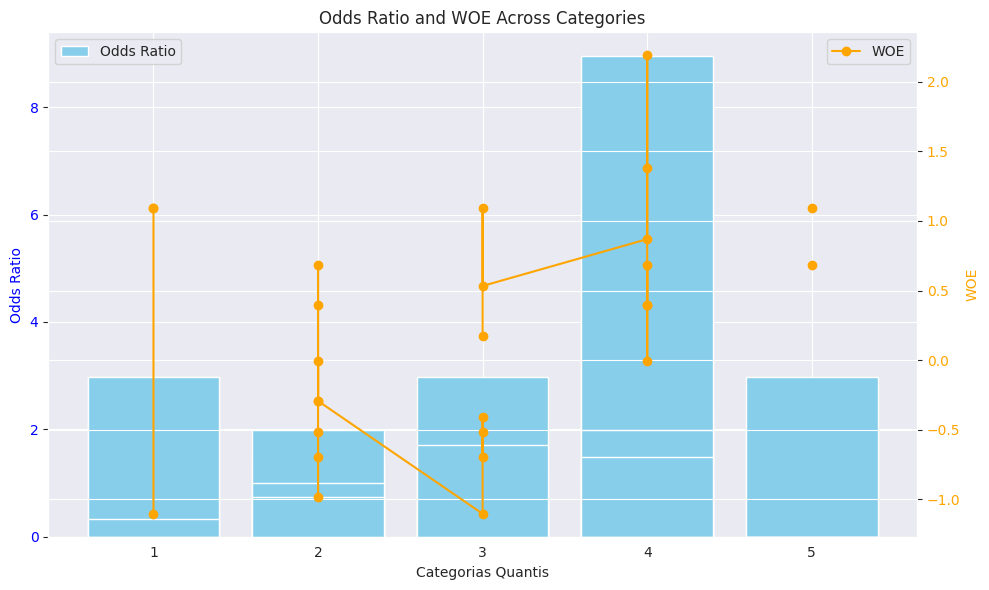

In [16]:
# Plotting odds_ratio and woe from bivariada across categories
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for odds_ratio
ax1.bar(bivariada['categorias_quantis'], bivariada['odds_ratio'], color='skyblue', label='Odds Ratio')
ax1.set_xlabel('Categorias Quantis')
ax1.set_ylabel('Odds Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Odds Ratio and WOE Across Categories')
ax1.legend(loc='upper left')

# Line plot for WOE
ax2 = ax1.twinx()
ax2.plot(bivariada['categorias_quantis'], bivariada['woe'], color='orange', label='WOE', marker='o')
ax2.set_ylabel('WOE', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()